
In this project, we are implementing a large project using the **CIFAR-10** dataset. This is a data set contaning 10 classes of 32 X 32 colour images. The training set is perfectly balanced, with 6,000 images per class. The test set containg 10,000 instances. The task is to train an **MLP** and a **CNN** for the classification task and compare their performance.

For the **first part** we will prepare the data and visualise it before training the MLP and CNN. For the **second part**, we will train an **MLP** for classification and for the **third part**, we will train a **CNN** and for the **fourth part** we will compare both the above MLP and CNN.

As per the **CIFAR-10 Dataset's** details from the website: https://www.cs.toronto.edu/~kriz/cifar.html, the data set is divided into **five training batches** and **one test batch**, each with 10,000 images. The **test batch** contains exactly 1000 randomly-selected images from each class. The **training batches** contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.  

The **classes** in the data set are: **airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck**. The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "automobiles" includes sedans, SuVs, things of that sort. "truck" includes only big trucks. Neither includes pickup trucks.

All the tasks to be performed are divided into the following parts.
<br>

* **Part 1: Data preparation and visualisation**
      1(a). Importing the DataLoader class and calling the load_batch() function
      1(b). Splitting the training data to form a validation dataset(80/20 split)
      1(c). Function to display randomly sampled images from the datasets(train, validation, test sets)
* **Part 2: Implementation of an MLP for classification**
      2(a). MLP Hyperparameters
      2(b). MLP Architecture
      2(c). MLP Training and Testing
      2(d). MLP Classification Results   
      
* **Part 3: Implementation of a CNN for classification**
      3(a). CNN Hyperparameters
      3(b). CNN Architecture
      3(c). CNN Training and Testing
      3(d). CNN Classification Results
* **Part 4: Comparison and Summary**
<br>        
Let us peform the tasks.

To execute this notebook,we **need to download the cifar-10-python.tar.gz file** from the link CIFAR-10 python version.  
The direct link is https://www.cs.toronto.edu/kriz/cifar-10-python.tar.gz  

On Linux, we can unzip the file using the command tar xvfz cifar-10-python.tar.gz. On Windows, we may need to unzip twice, firstly to get the cifar-10-python.tar file and then unzip to get the data files. If our unzipping operation is successful, we should see a subdirectory named cifar-10-batches-py. Under there, we should find the following files:  
batches.meta  
data_batch_1  
data_batch_2  
data_batch_3  
data_batch_4  
data_batch_5  
readme.html  
test_batch   

We should move all these files to the same directory with our CIFAR-10.ipynb file. Here, the dataset has been organised as follows: The training set is split into five data batch files. The test set is in the test batch file.
We also need to download the **'data_loader.py'** from this repository. This file contains a Python class called DataLoader. The function load_batch can be used to read the dataset.  

**This notebook is executed on GoogleColab with GPU** as the training of our MLP and CNN will take a long time to complete if our computer does not have a GPU. It is very easy to upload all the batch files for the dataset, data loader.py, and our CIFAR-10.ipynb file onto our Google Drive.  
By default, GPU is not available on Colab. To specify that we need a GPU, select the menu item Runtime and then the option Change runtime type. In the popped-up window, select “GPU” for Hardware accelerator.

In [2]:
#checking the tensorflow and keras versions
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print("keras",keras.__version__)

2.5.0
keras 2.5.0


As we are training our MLP and CNN using google colab, the below code is to be used to mount the data files on the drive and then change the current working directory to the directory where the uploaded data files are present. Then, we can import the classes/files to run our code.  

In [3]:
#mouting the drive 

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
!pwd   #getting the current working directory
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')   #changing the current working directory to the one where the files are
!pwd    #double checking the updated working directory

/content
/content/drive/MyDrive/Colab Notebooks


In [5]:
# After executing the cell above, Drive files will be present in "/content/drive/My Drive".

#!ls "/content/drive/MyDrive/Colab Notebooks"    #listing the files to check if any are missing.

### Part 1: Data preparation and visualisation
###### 1(a). &emsp; Importing the DataLoader class and calling the load_batch() function
**Remember that the 'data_loader.py' should be saved in the same directory as this notebook.**
First, we will Import the `DataLoader` class and then read the dataset by calling the **load_batch()** function.

In [6]:
#all imports needed to run the code

from data_loader import DataLoader

import os
import time

#import for splitting the datasets
from sklearn.model_selection import train_test_split

#import for plotting 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#import for tensorflow
import tensorflow as tf
from tensorflow import keras

#imports for mlp and cnn
from keras.models import Sequential, load_model
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import SGD, Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler, TensorBoard
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

# import for showing the confusion matrix
import itertools
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# According to the CIFAR-10 website, the training set is split into five batches
# stored in fives files. Each colour image has dimensions equal to 32 x 32 x 3. There
# are 10 classes.
image_width, image_height, image_Nchannels = 32, 32, 3
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# The default values of all the arguments of the load_batch function have been
# set for the CIFAR-10 dataset.
X_train, y_train = DataLoader.load_batch('data_batch')
X_test, y_test = DataLoader.load_batch('test_batch', Nbatches=1)


In [8]:
#printing the intial train and test set's shapes
print("\033[1mThe shape of the initial training data is as below:\033[0m")
print('X_train.shape =', X_train.shape, 'data type:', X_train.dtype)
print('y_train.shape =', y_train.shape, 'data type:', y_train.dtype)

print("\033[1mThe shape of the test data is as below:\033[0m")
print('X_test.shape =', X_test.shape, 'data type:', X_test.dtype)
print('y_test.shape =', y_test.shape, 'data type:', y_test.dtype)

The shape of the initial training data is as below:
X_train.shape = (50000, 32, 32, 3) data type: float32
y_train.shape = (50000,) data type: uint8
The shape of the test data is as below:
X_test.shape = (10000, 32, 32, 3) data type: float32
y_test.shape = (10000,) data type: uint8


###### 1(b) &emsp; Splitting the training set to form a validation set using 80/20 random split
We now are splitting our training data, which consists of 50,000 instances to form a new validation set with 20% of the initial training data(10,000 instances).

In [9]:
# splitting the training set to form a validation set with a 80/20 split. The original training set would become smaller.

X_train,X_valid,y_train,y_valid = train_test_split(X_train,y_train,test_size=0.20, random_state=10)

In [10]:
#printing the modified train and validation set's shapes
print("\033[1mThe shape of the modified training data is as below:\033[0m")
print('X_train.shape =', X_train.shape, 'data type:', X_train.dtype)
print('y_train.shape =', y_train.shape, 'data type:', y_train.dtype)

print("\033[1mThe shape of the validation data is as below:\033[0m")
print('X_valid.shape =', X_valid.shape, 'data type:', X_valid.dtype)
print('y_valid.shape =', y_valid.shape, 'data type:', y_valid.dtype)

The shape of the modified training data is as below:
X_train.shape = (40000, 32, 32, 3) data type: float32
y_train.shape = (40000,) data type: uint8
The shape of the validation data is as below:
X_valid.shape = (10000, 32, 32, 3) data type: float32
y_valid.shape = (10000,) data type: uint8


###### 1(c) &emsp; Function to display 20 randomly sampled images from the arguments for train, validation and test sets
The below **sample_image()** function takes the data set(train/validation/test) as its arguments and displays 20 randomly sampled images from those particular data sets

In [11]:
#function to display randomly sampled images
def sample_image(X,y):
    n_rows = 2
    n_cols = 10
    plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            plt.subplot(n_rows, n_cols, index + 1)
            plt.imshow(X[index], cmap="binary", interpolation="nearest")
            plt.axis('off')
            plt.title(class_names[y[index]], fontsize=12)
            plt.subplots_adjust(wspace=0.2, hspace=0.5)
    plt.show()

Train set's 20 random instances are as below 


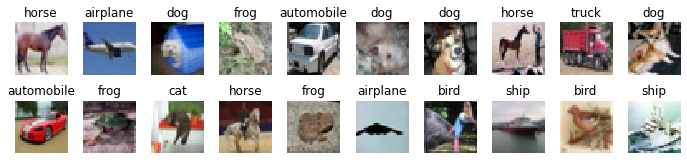

Validation set's 20 random instances are as below  


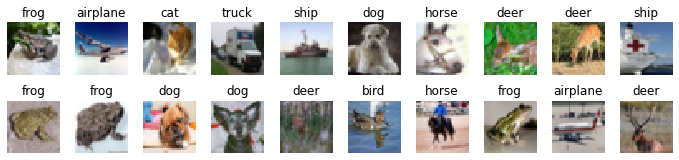

Test set's 20 random instances are as below 


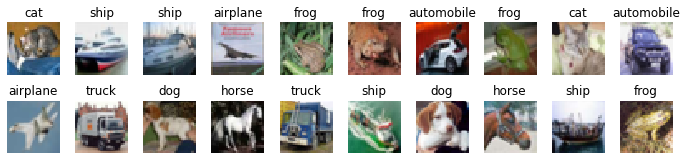

In [12]:
#displaying 20 randomly sampled images from the train, validation, and test sets
print("\033[1mTrain set's 20 random instances are as below \033[0m")
sample_image(X_train,y_train)
print("\033[1mValidation set's 20 random instances are as below \033[0m ") 
sample_image(X_valid,y_valid)
print("\033[1mTest set's 20 random instances are as below \033[0m") 
sample_image(X_test,y_test)

### Part 2: Implementation of an MLP
###### 2(a), 2(b), & 2(c) Model's hyperparameters, architecture and then training the model
In the below code, we will first **check if the MLP model subdirectory is present in the current directory or not**. **If it is present, we will load the model**, display its architecture and then train it for one epoch. **If it is not present, we will setup the model**, display its architecture, and train the model from scratch using the optimal hyperparameter values for 100 epochs.  
Our model has **2 hidden layers (each with 500 and 200 neurons) and an output layer (with 10 neurons 1 for each class in the dataset)**. We've used **relu (Rectified Linear Unit)** activation function **in the hidden layers** and **softmax** activation function **in the output layer** as we are **doing a classification task**.  

The hyperparameters we considered in our model are **connection weight initialisation, learning rate scheduling, and dropout rate**.  
* For **learning rate scheduling**, we've used a small function to calculate the learning rate based on the current epoch's learning rate. When experimented with many values of s(number of steps it takes to divide the learning rate by one more unit) like 4, 5, 15, 20, we got better results(accuracy improved by  3% from 48 to 51  when s=20, with an initial learning rate of 0.01
* We've applied dropout regularization before every **Dense** layer. This **dropout rate** hyperparameter, during training, randomly drops some inputs(setting them to 0) and divides the remianing inputs by the keep probability. We've tried a dropout rates of 0.01, 0.02, 0.2, and 0.25 which performed better than others.
* We've experimented with different combinations of neurons for the input and hidden layers - [300,100,100], [500,200,10], and **SGD and Adam optimizers**. **SGD optimizer performed better than Adam optimizer in case of our MLP model**. 
* We've also used GridSearchCV to find optimal hyperparameter values for the dropout rate with two different values and found that a dropout rate of 0.25 is an optimal one among our chosen ones. The code for the GridSearchCV is in the markdown cell below.

We've experimented with a few possible settings for each of these hyperparameters - **Connection weight initialisation, learning rate scheduling, and dropout rate** and noticed that the accuracy rates on the model are best when we considered [500,200,100] neurons for our model, with a dropout rate of 0.25, initial learning rate of 0.01 with s=20.  
The code for the model checkpoints, visualising tensorboard logs and learning curves plots is executed while testing but is commented in this notebook.  

On an average, we've **got an accuracy of 51 - 52% on our validation set** and an accuracy of **50 - 51% on our test set** when using these optimal hyperparameters over multiple attempts of training. But, when we've training the model for one epoch using the previously saved model, the accuracy fell to a rate of 46 - 47% for the validation set and 45 - 46% for the test set.  

When training our model, we will store the training loss values and metrics in a history object, so we can visualize the training process later.


In [13]:
#checking if the model is present in the current directory and loading the model, displaying the architecture

np.random.seed(10)
tf.random.set_seed(10)

if(os.path.isdir('CIFAR-10_MLP')):
  #loading the model if available
  mlp_model = load_model("CIFAR-10_MLP")
  print("\n\033[1mThe MLP model's architecture is:\n\033[0m")
  mlp_model.summary()
    
  #training the model for 1 epoch
  history = mlp_model.fit(X_train, y_train, epochs=1, validation_data=(X_valid, y_valid))  
else: 
  #setting up a model
  mlp_model = Sequential()   #creating a sequential model
  mlp_model.add(Flatten(input_shape=[32, 32, 3]))   #building the first layer and adding it to the model

  mlp_model.add(Dense(500, activation="relu"))   #adding a Dense hidden layer with 500 neurons with ReLu as activation function
  mlp_model.add(Dropout(rate=0.25))   #adding a dropout layer

  mlp_model.add(Dense(200, activation="relu"))   #adding second Dense hidden layer with 200 neurons also using ReLu as activation function
  mlp_model.add(Dropout(rate=0.25))

  mlp_model.add(Dense(10, activation="softmax"))   #adding a Dense output layer with 10 neurons (one per class) using the softmax activation function
  
  #connection weight initialization: (3072, 500)
  hidden1 = mlp_model.layers[1]
  weights, biases = hidden1.get_weights()
  print("\033[1mConnection Weights:\033[0m", weights.shape)
    
  #displaying the model's architecture
  print("\033[1mThe MLP model's architecture is:\n\033[0m") 
  mlp_model.summary()

  #model compilation
  optimizer = SGD()   #SGD optimizer 
  mlp_model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

  #learning rate calculating function  
  def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):     #function takes the current epoch and returns the learning rate
      return lr0 * 0.1**(epoch/s)
    return exponential_decay_fn
  exponential_decay_fn = exponential_decay(lr0=0.01, s=20)   #calling exponential_decay() with initial lr rate 0.01, s=20
  
  #tensorboard logs
  #root_logdir = os.path.join(os.curdir, "my_cifar10_logs")
  #def get_run_logdir():
  #  import time
  #  run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S") 
  #  return os.path.join(root_logdir, run_id)
  #run_logdir = get_run_logdir()
  
  #defining model checkpoints and early stopping 
  early_stopping_cb = EarlyStopping(patience=6)    #early stopping callback
  #model_checkpoint_cb = ModelCheckpoint("CIFAR-10_MLP", save_best_only=True) 
  #tensorboard_cb = TensorBoard(run_logdir)
  lr_scheduler = LearningRateScheduler(exponential_decay_fn)   #learning rate scheduler callback
  callbacks = [lr_scheduler, early_stopping_cb]  #model_checkpoint_cb, tensorboard_cb

  #training the model with optimal parameters and then saving the trained model
  history = mlp_model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=callbacks)
  mlp_model.save("CIFAR-10_MLP")
    

Connection Weights: (3072, 500)
The MLP model's architecture is:

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 500)               1536500   
_________________________________________________________________
dropout (Dropout)            (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               100200    
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2010      
Total params: 1,638,710
Trainable params: 1,638,710
Non-

In [14]:
#visualising the logs using tensorboard
#%load_ext tensorboard
#%tensorboard --logdir=./my_logs --port=6006

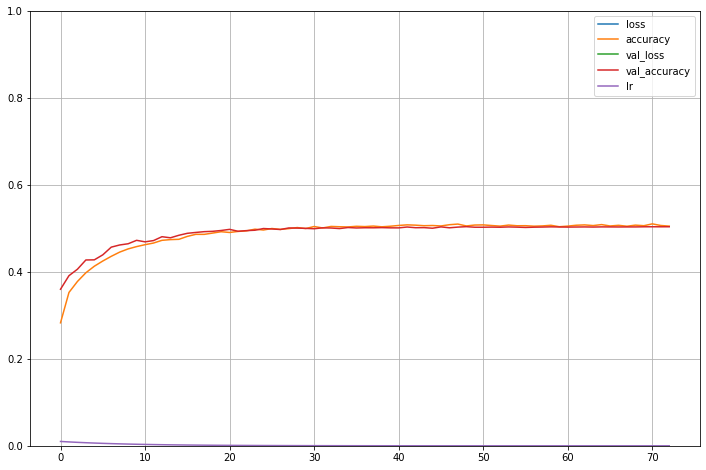

In [15]:
#plotting the learning curves
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) #set the vertical range to [0-1]
plt.show()

###### 2(c) Testing the model on the test set
We now evaluate our model on the test set to see its performance.

In [16]:
#testing the model on the test set
mlp_model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.3957 - accuracy: 0.5035


[1.3956502676010132, 0.5034999847412109]

As you can see, **the results on the test set reached just over 50%**. This means that **in approximately 50% of the cases our model was correct**. We can fine tune it further and run it for more number of epochs to go past 51%.  

Let us **take a look at the loss values**. At first, loss went down slowly, reached a minimum at about the 33rd epoch, and then went up again. This is a clear sign that our model is overfitting, or that it is highly adapted to our training set. This may mean that the performance on data it has never seen before is worse than if the training process was stopped at for example the 33rd epoch.

###### 2(d). MLP Classification Results 
To see the MLP classification results, we now **plot the confusion matrix on the test set** and also display the **classification report** to get more details on the accuracy, f1-scores. For plotting the confusion matrix with class labels, we will write a plot_confusion_matrix() function.

In [17]:
#function to plot a confusion matrix with class labels
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

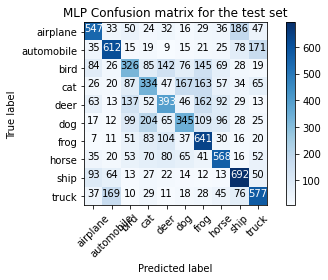

In [18]:
mlp_results = mlp_model.predict(X_test)
#convert from class probabilities to actual class predictions
mlp_predicted_classes = np.argmax(mlp_results, axis=1)
#Names of predicted classes
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
#Generate the confusion matrix
mlp_cnf_matrix = confusion_matrix(y_test, mlp_predicted_classes)

#Plot confusion matrix
plt.figure()
plot_confusion_matrix(mlp_cnf_matrix, classes=class_names, title='MLP Confusion matrix for the test set')
plt.show()

In [19]:
#printing the classification report
mlp_y_pred = mlp_model.predict_classes(X_test)
print(classification_report(y_test,mlp_y_pred, target_names=class_names))

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

    airplane       0.58      0.55      0.56      1000
  automobile       0.62      0.61      0.62      1000
        bird       0.39      0.33      0.35      1000
         cat       0.36      0.33      0.35      1000
        deer       0.43      0.39      0.41      1000
         dog       0.43      0.34      0.38      1000
        frog       0.47      0.64      0.55      1000
       horse       0.55      0.57      0.56      1000
        ship       0.58      0.69      0.63      1000
       truck       0.56      0.58      0.57      1000

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000



From the above classification results, we can see that our MLP model has a **classification accuracy of 51%**. The overall precision is above 36% with the **class automobile having a 63% precision rate** and the **class cat having a 36% (least) precision rate.**  
We can also see that more than 33% of the classes can be found over the whole number of elements of these classes (recall rate) with the classses bird and cat being the least and the class ship being the highest. The **class ship has the highest f1-score** where as the **classes bird and cat has the least score.**  
We can calculate the biases from our precision and recall values. The classes with **high recall but low precision tend to be overpredicted**, while those with **low recall but high precision tend to be under represented** in our predictions.  

###### Displaying a few correctly classified images and a few failure cases
We now **display a few correctly classified images along with a few failure cases** with their predicted and true class labels and also probabilities. We will display the **correctly classified images with the descriptions in green** and the **failed cases with the descriptions in red**. 

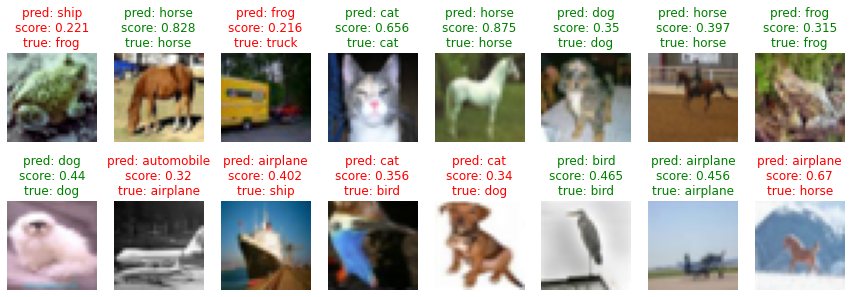

In [20]:
#displaying a few correctly classified images and a few failure cases
mlp_y_pred_test = mlp_model.predict(X_test)
mlp_y_pred_test_classes = np.argmax(mlp_y_pred_test, axis=1)
mlp_y_pred_test_max_prob = np.max(mlp_y_pred_test, axis=1)

cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_test))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(X_test[random_index, :])
        mlp_pred_label =  class_names[mlp_y_pred_test_classes[random_index]]
        mlp_pred_prob = mlp_y_pred_test_max_prob[random_index]
        mlp_true_label = class_names[y_test[random_index]]
        ax.set_title("pred: {}\nscore: {:.3}\ntrue: {}".format(mlp_pred_label, mlp_pred_prob, mlp_true_label), color=("green" if mlp_pred_label==mlp_true_label else "red"))
plt.show()


### Part 3: Implementation of a CNN
###### 3(a), 3(b), & 3(c) Model's hyperparameters, architecture and then training the model
In the below code, like we've done in our MLP model implementation, we will first **check if the CNN model subdirectory is present in the current directory or not**. **If it is present, we will load the model**, display its architecture and then train it for one epoch. **If it is not present, we will setup the model**, display its architecture, and train the model from scratch using the optimal hyperparameter values for 100 epochs.  

Our model has **2 convolutional layers, each with 32, 32 kernels and kernel sizes of 3, 3 in the first and second convolutional layers**, **MaxPooling2D, BatchNormalization, and Dropout layers** inbetween the two convolutional layers.  
The significance of the **MaxPooling2D layer** is the reduction in feature mapsize, which translates to an increase in receptive size. The output of the last MaxPooling2D operation is a stack of feature maps.  
The **BatchNormalization layer** is used to utilize the large learning rates without causing instability during the training.
The **Flatten layer** is to convert the stack of feature maps into a vector format that is suitable for either dropout or dense layers. Also, the Dense layer, responsible for generating the actual classification only work with one dimensional data.  
As we are using a **softmax** activation function, we will get a discrete multiclass probability distribution as our output for any input.

The hyperparameters we considered in our model are **kernel size, number of kernels, and activation function**.  
The hyperparameter **number of kernels/filters** is the number of output channels, **kernel size** is an integer or a tuple specifying the width and height of the 2D convolutional window. Generally, it should be 2*2 or 3*3 to extract better local feature. In case of CNN models, **'elu' activation function** actually seems to learn faster than others and they are able to learn models which are atleast as good as 'ReLU' like networks. **padding='same'** adds zero padding to the input, so that the output has the same width and height.
* For **learning rate scheduling**, we've used the same function and values from our MLP model.
* We've applied the same dropout regularization for this model as well. 
* We've experimented with different combinations for the number of kernels like 32, 64, and 3, 2 for the kernel sizes. We've also experimented with **'relu' and 'elu'** activation functions with **'Adam' and 'SGD' optimizers**.  

**All our experimental values for the hyperparameters of both the models are tabulated under the comparison and summary part of this project. The network architecture is also explained under the summary part.**  

When training our model, we will store the training loss values and metrics in a history object, so we can visualize the training process later.


In [ ]:
#checking if the model is present in the current directory and loading the model, displaying the architecture

np.random.seed(10)
tf.random.set_seed(10)

if(os.path.isdir('CIFAR-10_CNN')):
  #loading the model if available
  cnn_model = load_model("CIFAR-10_CNN")
  print("\033[1mThe CNN model's architecture is:\n\033[0m")
  cnn_model.summary()
  #training the model for 1 epoch
  history = cnn_model.fit(X_train, y_train, epochs=1, validation_data=(X_valid, y_valid))  
else: 
  #setting up a model
  cnn_model = Sequential()   #creating a sequential model
  cnn_model.add(Conv2D(32, (3,3), activation='elu', padding='same', input_shape=[32, 32, 3]))   #adding first convolutional layer to the model
  cnn_model.add(MaxPooling2D(2))   #adding pooling layer to the model
  cnn_model.add(BatchNormalization())   #adding batch normalization layer  
  cnn_model.add(Dropout(rate=0.25))    #adding a dropout layer
    
  cnn_model.add(Conv2D(32, (3,3), activation='elu', padding='same'))   #adding second convolutional layer to the model
  cnn_model.add(MaxPooling2D(2))
  cnn_model.add(BatchNormalization())   #adding batch normalization layer
  cnn_model.add(Dropout(rate=0.25))   #adding a dropout layer
  
  cnn_model.add(Flatten())   #adding a flatten layerto convert the stack of feature maps into a vector format
  cnn_model.add(Dense(256, activation="elu"))   #adding a fully connected layer
  cnn_model.add(BatchNormalization())   #adding one more batch normalization layer
  cnn_model.add(Dropout(rate=0.25))    #adding our final dropout layer

  cnn_model.add(Dense(10, activation='softmax'))   #adding a Dense output layer with 10 neurons (one per class) using the softmax activation function
  
  #displaying the model's architecture
  print("\033[1mThe CNN model's architecture is:\n\033[0m") 
  cnn_model.summary()

  #model compilation
  optimizer = Adam()   #Adam optimizer 
  cnn_model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

  #learning rate calculating function  
  def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):     #function takes the current epoch and returns the learning rate
      return lr0 * 0.1**(epoch/s)
    return exponential_decay_fn
  exponential_decay_fn = exponential_decay(lr0=0.01, s=20)   #calling exponential_decay() with initial lr rate 0.01, s=20
  
  #defining model checkpoints and early stopping 
  early_stopping_cb = EarlyStopping(patience=8)    #early stopping callback
  #model_checkpoint_cb = ModelCheckpoint("CIFAR-10_CNN", save_best_only=True) 
  lr_scheduler = LearningRateScheduler(exponential_decay_fn)   #learning rate scheduler callback
  callbacks = [lr_scheduler, early_stopping_cb]  #model_checkpoint_cb, tensorboard_cb

  #training the model with optimal parameters and then saving the trained model
  history = cnn_model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=callbacks)
  cnn_model.save("CIFAR-10_CNN")
    

The CNN model's architecture is:

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 16, 32)        128       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
batch_normalization_

In [ ]:
#plotting the learning curves
pd.DataFrame(history.history).plot(figsize=(10, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

###### 3(c) Testing the model on the test set
We now evaluate our model on the test set to see its performance.

In [ ]:
#testing the model on the test set
cnn_model.evaluate(X_test,y_test)

As you can see, **the results on the test set reached approximately ~76%**. This means that **in approximately 76% of the cases, our model was correct** and this is inline with the validation accuracies as well. We can fine tune it further and run it for more number of epochs to go past 76%.  

###### 3(d). CNN Classification Results 
To see the CNN classification results, we now **plot the confusion matrix on the test set** and also display the **classification report** to get more details on the accuracy, f1-scores. For plotting the confusion matrix with class labels, we will write a plot_confusion_matrix() function.

In [ ]:
cnn_results = cnn_model.predict(X_test)
#convert from class probabilities to actual class predictions
cnn_predicted_classes = np.argmax(cnn_results, axis=1)
#Names of predicted classes
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
#Generate the confusion matrix
cnn_cnf_matrix = confusion_matrix(y_test, cnn_predicted_classes)

#Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnn_cnf_matrix, classes=class_names, title='CNN Confusion matrix for the test set')
plt.show()

In [ ]:
#printing the classification report
cnn_y_pred = cnn_model.predict_classes(X_test)
print(classification_report(y_test,cnn_y_pred, target_names=class_names))

From the above classification results, we can see that **our CNN model** has a **classification accuracy of 76%**. The overall precision is above 61% with the **class automobile having a 90% precision rate** and the **class cat having a 61% (least) precision rate.**  
We can also see that more than 58% of the classes can be found over the whole number of elements of these classes (recall rate) with the classs cat being the least and the class ship being the highest. The **class automobile has the highest f1-score** where as the **class cat has the least score.**

###### Displaying a few correctly classified images and a few failure cases
We now **display a few correctly classified images along with a few failure cases** with their predicted and true class labels and also probabilities. We will display the **correctly classified images with the descriptions in green** and the **failed cases with the descriptions in red**.

In [ ]:
#displaying a few correctly classified images and a few failure cases
cnn_y_pred_test = cnn_model.predict(X_test)
cnn_y_pred_test_classes = np.argmax(cnn_y_pred_test, axis=1)
cnn_y_pred_test_max_prob = np.max(cnn_y_pred_test, axis=1)

cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_test))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(X_test[random_index, :])
        cnn_pred_label =  class_names[cnn_y_pred_test_classes[random_index]]
        cnn_pred_prob = cnn_y_pred_test_max_prob[random_index]
        cnn_true_label = class_names[y_test[random_index]]
        ax.set_title("pred: {}\nscore: {:.3}\ntrue: {}".format(cnn_pred_label, cnn_pred_prob, cnn_true_label), color=("green" if cnn_pred_label==cnn_true_label else "red"))
plt.show()

### Part 4: Comparison and summary
Before comparing the performances of our MLP and CNN models, let us have a look at the results obtained with the various combinations of values used for the hyperparameters.

**MLP Performance with the experimental hyperparameter values we've used**   

| Layers   | Dropout rate| Learning rate, s | Optimizer | Train Accuracy(%) | Test Accuracy(%) | 
| :- | -: | :-: | :-: | :-: | :-: 
| 300,100,10 | 0.05 | 0.01, 4  | SGD  | 45 | 44 
| 500,200,10 | 0.05 | 0.01, 4  | SGD  | 45 | 46 
| 600,300,10 | 0.05 | 0.01, 4  | SGD  | 44 | 44
| 300,100,10 | 0.25 | 0.01, 2  | SGD  | 42 | 41  
| 300,100,10 | 0.25 | 0.01, 4  | SGD  | 42 | 42 
| 500,200,10 | 0.01 | 0.02, 4  | SGD  | 48 | 48
| 500,200,10 | 0.25 | 0.01, 5  | SGD  | 45 | 46 
| 500,200,10 | 0.25 | 0.01, 15 | SGD  | 52 | 52  
| 500,200,10 | 0.25 | 0.01, 10 | SGD  | 48 | 49
| **500,200,10** | **0.25** | **0.01, 20** | **SGD**  | **50** | **51** 
| 500,200,10 | 0.25 | 0.01, 20 | Adam |  9 | 10

For **10000 images**, using our MLP model, we managed to predict what an input image represents, **with an accuracy of 51%**.

**CNN Performance with the experimental hyperparameter values we've used**   

| Kernels, Kernel size | neurons-connected layer| Optimizer | Activation | Train Accuracy(%) | Test Accuracy(%) | 
| :-: | :-: | :-: | :-: | :-: | :-: 
| 64,64, 4 | 256 | Adam | ReLU | 74 | 73 
| 64,32, 4 | 512 | Adam | ReLU | 70 | 70
| 32,32, 3 | 256 | Adam | ReLU | 73 | 74
| **32,32, 3** | **256** | **Adam** | **ELU** | **75** | **75**
| 32,32, 3 | 256 | SGD  | ReLU | 67 | 67 
| 32,32, 3 | 256 | SGD  | ELU  | 65 | 65
| 32,32, 3 | 512 | Adam | ELU  | 76 | 75
| 32,32, 2 | 512 | Adam | ReLU | 74 | 74

For **10000 images**, using the simple 32 x 32 x 3 matrix of values between 0 and 255, we managed to determine what an input image represents, **with an accuracy of 76%** using our CNN model.

**In our MLP model**, we can clearly notice that the **loss function was not dropping enough** and hence not converging well. Also, it is clear that, for our image classification task, the CNN model used less number of learnable parameters.

From the **confusion matix of our MLP model, automobile & truck as well as cat & dog classes are the commonly confused ones**. We can also observe that the animals are more likely to be mispredicted as another animal than a vehicle. And also one vehicle is also confused for another vehicle(which can be seen from the slightly darker shading cells).  
From the confusion matrices of both the models, we can observe that the Classes **ship, frog and dog worked well or failed in both the models.** In both the models, the classes ship and frog performed well with the highest accuracies, where as the class dog failed. The Classes **bird, deer, truck, airplane, automobile and horse worked well in model but failed in the other model.** The classes bird, deer and truck performed better in CNN where as the classes airplane, automobile and horse performed better in MLP. This is a bit better in our CNN model, where the commonly confused classes are automobile & airplane as well as cat & dog.

In our project, our **MLP model took around 4 minutes** to execute with GPU using Google Colab, where as our **CNN model took around 2 minutes**.  

**Network architecture of both the models**
In our MLP model, the number of parameters can be computed by focusing on how the output of the perceptron is computed. From the flatten layer to the first dense layer, we have 3072 x 500 + 500 = 1,536,500 parameters, where 500 is the number of hidden units. From the first dense layer to the second dense layer, we have 500 x 200 + 200 = 100200 parameters. So, we have a total of 1,638,710 parameters in total for our MLP model. From this, we can infer that MLPs are not that parameter efficient.
  
In our CNN model, the conv2d_1 layer has 896 parameters because each kernel has 3 x 3 = 9 paramaters, and each of the 32 feature maps has one kernel and 1 bias parameter and also our dataset has 3 channels in total. So, we have 3(32 x 9) + 32 = 896 parameters. The parameters for the other convolutional layer can be calculated in the same way.  

When we look at both our MLP and CNN models architecture, we can observe that **CNN has a smaller number of parameters at 538,538 compared to the 1,638,710 (nearly 3 times to those in CNN) when MLP layers** are used. The reason behind this is MLP is fully connected. Each mode is connected to another in a very dense web, resulting in redundancy and inefficiency. 

It is easier to train a CNN as the weights are smaller and shared. Also, CNNs have an ability to develop an internal representation of a 2-dimensional image.  


In this CIFAR-10 dataset,the performance of MLP was not as well as expected and was even more awful than that of the CNN. **CNN almost performed much better than MLP**. At the start of CNN and MLP, the absolute value of gradient of curve of CNN was larger than that of MLP, which means that CNN can learn more efficiently than MLP. The gradient can show the rate of learning which is vital for a large project.  
Although our MLP didn't perform bad, our **CNN performed very well with less training time and parameters (nearly halved)**. If the hyperparameters are more optimized with techniques such as **image augmentation or transfer learning**, we can achieve even **more higher results**. 